In [1]:
import pandas as pd
import numpy as np
import os

import collections
import itertools
import ast
import re

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from krwordrank.word import KRWordRank

In [2]:
from konlpy.tag import Mecab

mecab = Mecab()

# with open('user_dict.txt', 'w') as dict: 
#     dict.write('해커스\tNNP\n일러스트\tNNP\n리커버\tNNP\n양장판\tNNP\n해리 포터\tNNP}')
    
# dicpath = 'user_dict.txt'

In [3]:
df = pd.read_csv('Book_title_1999to2020_in_aladin.csv')
df['writer'] = df['writer'].map(ast.literal_eval)
df.shape

(23200, 7)

In [4]:
df.head(2)

,year,month,title,url,writer,yr-mn,rank
0,2000,1,해리 포터와 마법사의 돌 1 (무선),https://www.aladin.co.kr/shop/wproduct.aspx?It...,"[(J.K. 롤링 (지은이), 김혜원 , (옮긴이), |)]",1-50,1
1,2000,1,해리 포터와 비밀의 방 1 (무선),https://www.aladin.co.kr/shop/wproduct.aspx?It...,"[(J.K. 롤링 (지은이), 김혜원 , (옮긴이), |)]",1-50,2


In [5]:
df[(df['writer'].map(len) != 1)]['writer'].size

258

In [6]:
df['writer'] = df[~(df['writer'].map(len) != 1)]['writer'].map(lambda x: ' '.join(x[0]))
df['writer'].head()

0               J.K. 롤링 (지은이), 김혜원  (옮긴이) |
1               J.K. 롤링 (지은이), 김혜원  (옮긴이) |
2                           도올 김용옥  (지은이) |
3    조애너 콜 (지은이), 브루스 디건 (그림), 이연수  (옮긴이) |
4    조애너 콜 (지은이), 브루스 디건 (그림), 이연수  (옮긴이) |
Name: writer, dtype: object

In [7]:
find_writer = re.compile(r"(.*?)\((.*?)\)")
df['split_writer'] = df[df['writer'].notna()]['writer'].map(find_writer.findall)
df['split_writer'].head()

0                   [(J.K. 롤링 , 지은이), (, 김혜원  , 옮긴이)]
1                   [(J.K. 롤링 , 지은이), (, 김혜원  , 옮긴이)]
2                                   [(도올 김용옥  , 지은이)]
3    [(조애너 콜 , 지은이), (, 브루스 디건 , 그림), (, 이연수  , 옮긴이)]
4    [(조애너 콜 , 지은이), (, 브루스 디건 , 그림), (, 이연수  , 옮긴이)]
Name: split_writer, dtype: object

In [8]:
df['title'] = df['title'].map(lambda x: x.replace('해리 포터', '해리포터'))

In [9]:
df[df['title'].map(lambda x: '해커스' in x)]

,year,month,title,url,writer,yr-mn,rank,split_writer
2564,2002,10,해커스 그래머 (Hackers Grammar),https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,10-100,65,"[(David Cho , 지은이)]"
2756,2002,12,해커스 그래머 (Hackers Grammar),https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,12-100,57,"[(David Cho , 지은이)]"
2793,2002,12,해커스 리딩 (Hackers Reading),https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,12-100,94,"[(David Cho , 지은이)]"
2947,2002,3,해커스 그래머 (Hackers Grammar),https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,3-50,48,"[(David Cho , 지은이)]"
3070,2002,4,해커스 그래머 (Hackers Grammar),https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,4-100,71,"[(David Cho , 지은이)]"
...,...,...,...,...,...,...,...,...
23078,2020,8,2020 하반기 최신판 해커스공기업 단기 합격 NCS 기본서 직업기초능력평가 + 직...,https://www.aladin.co.kr/shop/wproduct.aspx?It...,"김소원, 김태형, 복지훈, 윤종혁, 해커스 취업교육연구소 (지은이) |",8-100,79,"[(김소원, 김태형, 복지훈, 윤종혁, 해커스 취업교육연구소 , 지은이)]"
23080,2020,8,해커스 토익 RC 리딩 READING,https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,8-100,81,"[(David Cho , 지은이)]"
23086,2020,8,해커스 토익 실전 1000제 1 RC 리딩 문제집 (Hackers TOEIC Rea...,https://www.aladin.co.kr/shop/wproduct.aspx?It...,해커스어학연구소 (지은이) |,8-100,87,"[(해커스어학연구소 , 지은이)]"
23126,2020,9,해커스 토익 기출 보카 TOEIC VOCA 단어장,https://www.aladin.co.kr/shop/wproduct.aspx?It...,David Cho (지은이) |,9-50,27,"[(David Cho , 지은이)]"


In [10]:
mecab.nouns(df.iloc[2564]['title'])

['해커스', '그래머']

In [11]:
df['title-nouns'] = df['title'].apply(mecab.nouns)

In [12]:
df['title-nouns'].head()

0    [해리포터, 마법사, 돌, 무선]
1     [해리포터, 비밀, 방, 무선]
2              [노자, 세기]
3                [스쿨버스]
4                [스쿨버스]
Name: title-nouns, dtype: object

In [13]:
text_list = list(itertools.chain(*df['title-nouns'].tolist()))

In [14]:
len(text_list)

65664

In [15]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_frequencies(collections.Counter(text_list))

In [16]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


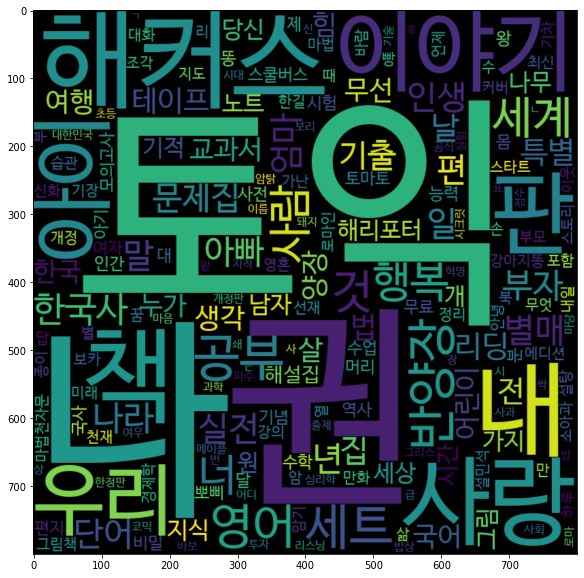

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")

In [18]:
import collections
count_words = collections.Counter(text_list)

In [19]:
count_df = pd.DataFrame.from_dict([count_words]).T.reset_index()
count_df.columns = ['title', 'counter']

In [20]:
count_df.head()

,title,counter
0,해리포터,149
1,마법사,34
2,돌,33
3,무선,163
4,비밀,134


In [21]:
filename = 'Book_title_1999to2020_in_aladin-processed.csv'

In [22]:
df.to_csv(filename, index = False)

In [23]:
count_df.to_csv('count_title_nouns.csv', index = False)